# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    y = (x**2) * numpy.sin(x)
    return y

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    z = ((2 - (x ** 2)) * numpy.cos(x)) + (2 * x * numpy.sin(x)) - 2
    return z

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    a = g(xmax) - g(xmin)
    return a

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    sum_of_xs = 0
    sum_of_mids = 0
    delta_x = (xmax - xmin) / N
    
    for i in range(N+1):
        xi = xmin + (i * delta_x)
        
        if i == 0 or i == N:
            sum_of_xs += f(xi)
        else:
            sum_of_xs += 2 * f(xi)
            
        if i != 0:
            sum_of_mids += 4 * f((xi + xi - delta_x) / 2)
            
    b = (delta_x / 6) * (sum_of_xs + sum_of_mids)
    return b

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Log-log plot of fractional error versus panel count')

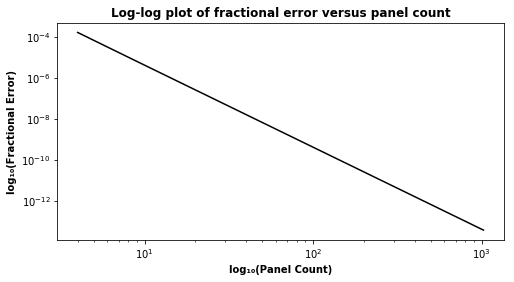

In [14]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fractional_error = []
for n in panel_counts:
    result_numeric = integrate_numeric(x0, x1, n)
    fractional_error.append((result_analytic - result_numeric)/result_numeric)    
    
#fractional_error = [numpy.log10(m) for m in fractional_error]
#panel_counts = [numpy.log10(p) for p in panel_counts]

plt.figure(figsize=(8, 4))
plt.plot(panel_counts, fractional_error, color = "black")
plt.ylabel("log\u2081\u2080(Fractional Error)", weight = "semibold")
plt.xlabel("log\u2081\u2080(Panel Count)", weight = "semibold")
plt.yscale('log')
plt.xscale('log')
plt.title("Log-log plot of fractional error versus panel count", weight = "bold")    

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels decreases the fractional error and therefore makes the numerical method more accurate. If the number of panels becomes too large numerical rounding errors start to appear, giving more random errors and the method becomes more and more inaccurate as $N$ increase.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule was used the accuracy of the numerical method would be reduced compared to the Simpson method shown above. As the number of panels is increased for the trapezium rule the accuracy also increases but at a slower rate than the Simpson method. The error using the trapezium rule is $N^{-2}$ whereas the error of the Simpson method is $N^{-4}$